<a href="https://colab.research.google.com/github/ThanhVinh174/AI/blob/main/Emotion_Reconize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import library

In [14]:
from keras.models import Sequential, load_model
from keras.layers import Flatten,Dense
from tensorflow.keras.optimizers import Adam,SGD
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras.datasets import mnist, fashion_mnist, cifar100
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
import pickle
from sklearn.utils import shuffle
import cv2

In [15]:
def plot_history(his):
  f1 = his.history['accuracy']
  loss = his.history['loss']
  plt.figure(figsize=(8, 8))
  plt.subplot(2, 1, 1)
  plt.plot(f1, label='Accuracy')
  plt.legend(loc='lower right')
  plt.title('Accuracy')
  plt.subplot(2, 1, 2)
  plt.plot(loss, label='Loss')
  plt.legend(loc='upper right')
  plt.title('Loss')
  plt.xlabel('epoch')
  plt.show()

In [8]:
with open('data_em.pickle', 'rb') as f:
    (x_train, y_train) = pickle.load(f)

x_train, y_train = shuffle(x_train, y_train)
x_train.shape

(107, 150, 150, 3)

In [9]:
x_train = x_train.astype('float32')

x_train /=255

y_train = np_utils.to_categorical(y_train,4)

y_train.shape

(107, 4)

In [10]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu',kernel_initializer ='he_uniform',padding ='same',input_shape=(150,150,3)))
model.add(Conv2D(32,(3,3),activation ='relu', kernel_initializer= 'he_uniform',padding = 'same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32,(3,3), activation = 'relu',kernel_initializer ='he_uniform',padding ='same'))
model.add(Conv2D(32,(3,3),activation ='relu', kernel_initializer= 'he_uniform',padding = 'same'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(32,(3,3), activation = 'relu',kernel_initializer ='he_uniform',padding ='same'))
model.add(Conv2D(32,(3,3),activation ='relu', kernel_initializer= 'he_uniform',padding = 'same'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())
model.add(Dense(128, activation ='relu',kernel_initializer='he_uniform'))
model.add(Dense(4,activation ='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 conv2d_7 (Conv2D)           (None, 150, 150, 32)      9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 conv2d_9 (Conv2D)           (None, 75, 75, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                  

In [32]:
opt = SGD(lr = 0.001, momentum =0)
model.compile(optimizer = opt, metrics = 'accuracy',loss = 'categorical_crossentropy')
his = model.fit(x_train, y_train, epochs = 50)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


4/4 [==============================] - 7s 1s/step - loss: 0.4797 - accuracy: 0.8131
Epoch 2/50
4/4 [==============================] - 6s 1s/step - loss: 0.3547 - accuracy: 0.9346
Epoch 3/50
4/4 [==============================] - 6s 1s/step - loss: 0.3138 - accuracy: 0.9813
Epoch 4/50
4/4 [==============================] - 6s 1s/step - loss: 0.3247 - accuracy: 0.9439
Epoch 5/50
4/4 [==============================] - 6s 1s/step - loss: 0.3000 - accuracy: 0.9813
Epoch 6/50
4/4 [==============================] - 6s 1s/step - loss: 0.3640 - accuracy: 0.9159
Epoch 7/50
4/4 [==============================] - 6s 1s/step - loss: 0.2919 - accuracy: 0.9439
Epoch 8/50
4/4 [==============================] - 6s 1s/step - loss: 0.2999 - accuracy: 0.9626
Epoch 9/50
4/4 [==============================] - 6s 1s/step - loss: 0.3752 - accuracy: 0.8598
Epoch 10/50
4/4 [==============================] - 6s 2s/step - loss: 0.3275 - accuracy: 0.9346
Epoch 11/50
4/4 [==============================] - 6s 1s/ste

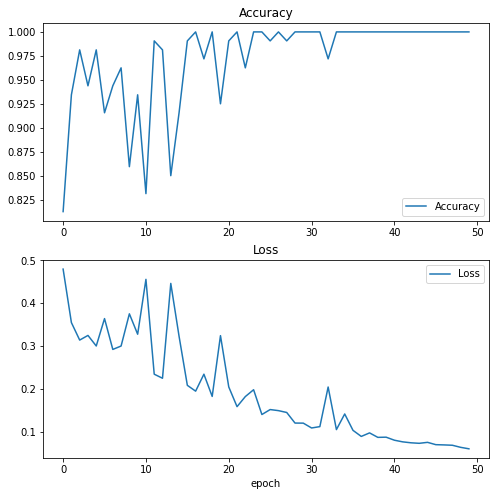

In [33]:
plot_history(his)

disgust


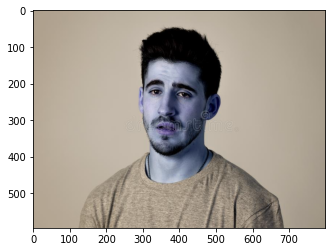

In [36]:
f = '/content/sad.jpg'
plt.imshow(cv2.imread(f))
img = cv2.resize(cv2.imread(f),(150,150))
label = ['anger','disgust','fear','happiness']

print(label[np.argmax(model.predict(img.reshape(1,150,150,3)))])